# What is a Recurrent Neural Network (RNN)?
An RNN is a type of neural network that is especially good at handling data that comes in sequences, like sentences, time series data, or videos. Unlike regular neural networks, which process one piece of data at a time, RNNs remember things from earlier in the sequence, helping them make better predictions.

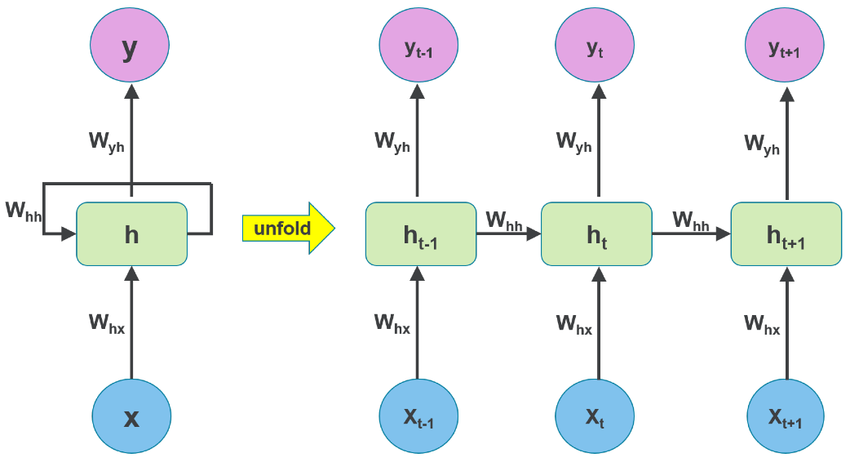

# Simple RNN Structure:
### Input Layer:

Imagine you're reading a sentence one word at a time. Each word you read is like an input to the RNN. For example, at time step 
t, the RNN gets the word xt.

### Hidden Layer (The Memory Part):

1. The hidden layer is like the RNN's memory. It remembers information from previous words in the sequence.

2. At each time step, the hidden layer takes two things:
 - The current word (input).
 
 - What it remembers from the previous word (the hidden state from the last step).

3. It then updates its memory (hidden state) based on this information. This allows the RNN to "think" about previous words while processing the current word.

### Output Layer:

1. After updating its memory, the RNN produces an output. This could be a prediction about the next word in a sentence, a category for an image, or any other type of result.

2. The output is based on the current memory (hidden state).

# Unfolded RNN:
When we "unfold" an RNN, we just show the same RNN at different time steps to make it easier to understand how it works over a sequence.

## Step by Step:

1. Imagine the RNN as a person reading a sentence. At each time step, they read one word, remember it, and use that memory to understand the next word better.

2. This process repeats for every word in the sentence, so the RNN keeps updating its memory as it goes along.

### Key Ideas:

1. Memory: The RNN can remember information from earlier in the sequence, which helps it make better decisions as it processes more data.

2. Reusing the Same Rules: The RNN uses the same rules (weights) to process each word in the sequence. This means it's very efficient because it doesn't need to learn new rules for every word.

In simple terms, an RNN is like a person who reads a sentence one word at a time, remembers what they've read, and uses that memory to better understand the whole sentence. This makes RNNs great for tasks like predicting the next word in a sentence or analyzing time-based data.

### Recurrent Neural Networks (RNNs) are a type of neural network architecture that is particularly well-suited for tasks involving sequential data. Unlike feedforward neural networks, which process data in fixed-size chunks, RNNs can handle input sequences of arbitrary length.

#### key features of RNNs:

- Recurrent Connections: RNNs have recurrent connections that allow information to persist across different time steps in a sequence. This means that information from previous inputs is considered when processing the current input.

- Shared Parameters: The same set of weights and biases are applied at each time step. This allows the network to use the same computation for different elements of the sequence.

- Time Dependency: RNNs are well-suited for tasks where the order or temporal dependency of data matters, such as time series prediction, language modeling, and speech recognition.



### Applications of RNNs:

- Language Modeling and Text Generation: RNNs can be used to model the probability distribution of sequences of words. This enables tasks like auto-completion, machine translation, and text generation.

- Time Series Prediction: RNNs are effective for tasks like stock price prediction, weather forecasting, and any scenario where the current state depends on previous states.

- Speech Recognition: RNNs can be used to convert spoken language into written text. This is crucial for applications like voice assistants (e.g., Siri, Alexa).

- Handwriting Recognition: RNNs can recognize handwritten text, enabling applications like digit recognition and signature verification.

- Image Captioning: RNNs can be combined with Convolutional Neural Networks (CNNs) to generate captions for images.

- Video Analysis: RNNs can process sequences of images or video frames, making them useful for tasks like action recognition, video captioning, and video prediction.

- Anomaly Detection: RNNs can be used to detect anomalies in sequences of data, making them valuable for tasks like fraud detection in finance or detecting defects in manufacturing.

- Sentiment Analysis: RNNs can analyze sequences of text to determine the sentiment expressed.


### Mathematical Implementation:

Terms:
- xt: Input at time step at t
- ht: Hidden state at time step at t
- Whx: Weight matrix for input-to-hidden connections
- Whh: Weight matrix for hidden-to-hidden connections
- bh:Bias term for hidden layer
- Wyh: Weight matrix for hidden-to-output connection
- by: Bias term for output layer

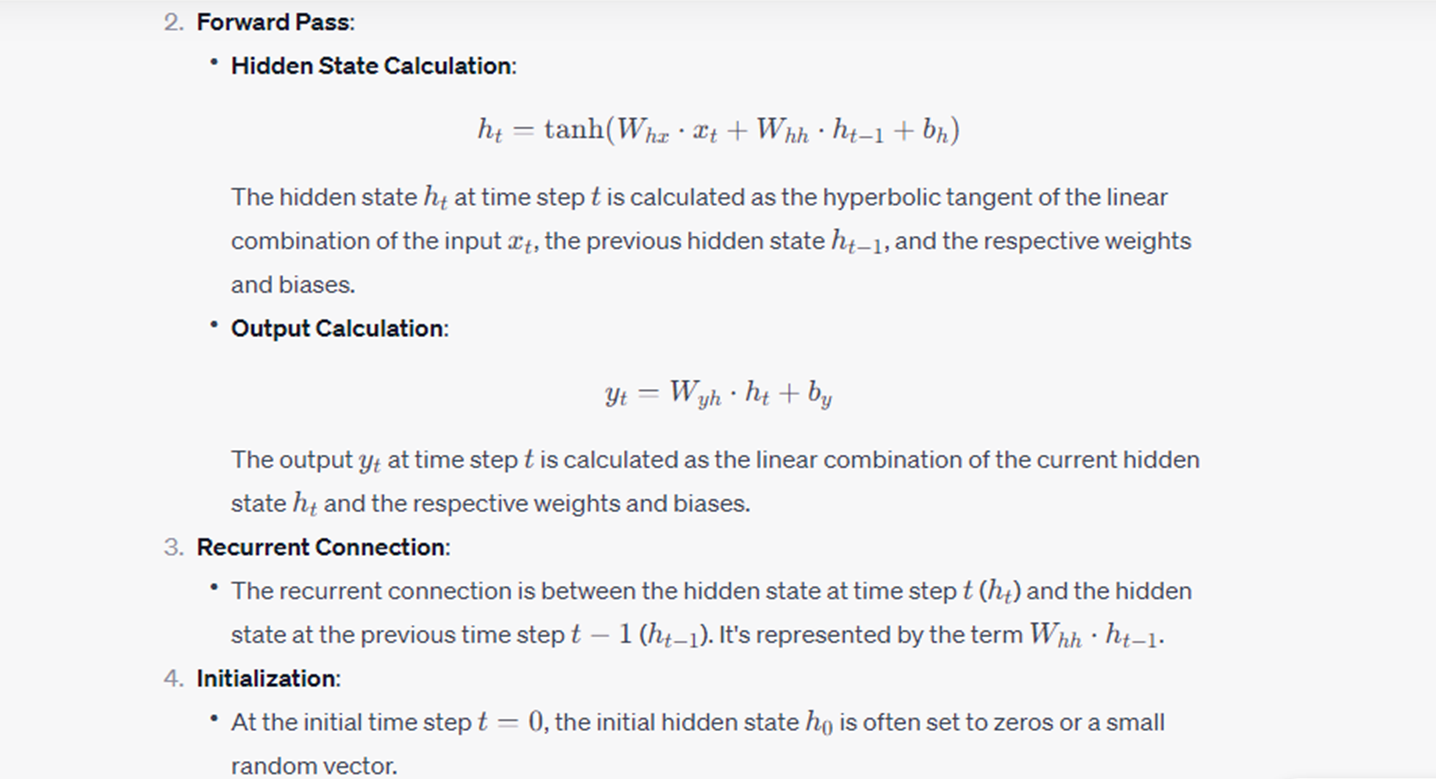



### Training:

During training, you would use backpropagation through time (BPTT) to compute gradients and update the weights and biases to minimize the loss function.
Prediction:

Once the network is trained, you can make predictions by passing a sequence of inputs through the network.
This is a basic mathematical interpretation of a simple RNN. 

### Let us use Keras library to create and train a basic RNN for a toy example of sequence prediction. This example uses a very simple sequence (1, 2, 3, 4, 5) and tries to predict the next number in the sequence.



In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some sample data
X = np.array([[i+j for j in range(5)] for i in range(100)])
y = np.array([i+5 for i in range(100)])

# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=8)

# Test the model
test_input = np.array([[i+j for j in range(5)] for i in range(100, 110)])
test_input = test_input.reshape((test_input.shape[0], test_input.shape[1], 1))
predicted_output = model.predict(test_input)

# Print the predicted output
print("Predicted Output:")
print(predicted_output.flatten())


C:\Users\monika201103\Anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2146.1238
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 565.8989 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1061 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.3186
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4213 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2493
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5300 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3748 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2302
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4567 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
Predicted Output:
[106.144035 107.17718  108.21029  109.243416 110.27654  111.30967
 112.3428   113.37591  114.409035 115.44216 ]


### Quick Practice ### Let's create a simple RNN using Keras with some sample data. In this example, we'll use a sequence of numbers to predict the next number in the sequence.

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate some sample data
np.random.seed(0)
sequence_length = 10
X = np.random.rand(100, sequence_length)
y = np.sum(X, axis=1)

# Reshape the data for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(units=32, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(1)
])

#units=32: This means the RNN layer has 32 hidden units (or neurons). 
#These units determine the dimensionality of the output space, which is the size of the hidden state vector the 
#RNN will produce at each time step.

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=8)

# Test the model
test_input = np.random.rand(10).reshape((1, sequence_length, 1))
predicted_output = model.predict(test_input)

# Print the predicted output
print("Predicted Output:", predicted_output[0, 0])


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 26.7618
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.2976
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 25.4977
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.9459
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.4767
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3003
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3282 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7801 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7187 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8046 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
Predicted Output: 5.03285


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate random data
np.random.seed(42)
data = np.random.rand(1000, 10)  # 1000 sequences, each of length 10
labels = np.random.rand(1000)    # 1000 target values

# Split data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data[:train_size]
train_labels = labels[:train_size]
test_data = data[train_size:]
test_labels = labels[train_size:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(10, 1), activation='relu'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

# Reshape data to match RNN input shape (samples, time steps, features)
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32)

# Evaluate the model
test_loss = model.evaluate(test_data, test_labels)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(test_data)

# Print predictions
print("Predictions:", predictions[:5])
print("True Values:", test_labels[:5])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2779
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0916
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0893
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0842
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0847
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0784
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0810
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0774
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0924  
Test Loss: 0.08818883448839188
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Predictions: [[0.42080092]
 [0.51271904]
 [0.4647613 ]
 [0.53492695]
 [0.4437973 ]]
True Values: [0.35121702 0.83724    0.06679708 0.94234351 0.98631684]
